In [2]:
from locscale.include.emmer.ndimage.map_utils import load_map, save_as_mrc
from locscale.include.emmer.ndimage.filter import get_cosine_mask
from locscale.include.emmer.pdb.pdb_to_map import pdb2map
from locscale.include.emmer.ndimage.fsc_util import calculate_fsc_maps
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
emmap_path = "/home/abharadwaj1/dev/current_focus/locscale_mf_blurred_test/for_tanja/cryosparc_P24_cryosparc_P24_J476_009_volume_map.mrc"
mask_path = "/home/abharadwaj1/dev/current_focus/locscale_mf_blurred_test/for_tanja/cryosparc_P24_cryosparc_P24_J476_009_volume_mask_refine.mrc"
pdb_path = "/home/abharadwaj1/dev/current_focus/locscale_mf_blurred_test/for_tanja/gbp1_p24_j267_ref_fin_fitted_in_J476.pdb"

emmap, apix = load_map(emmap_path)
mask, apix = load_map(mask_path)

simulated_map = pdb2map(pdb_path, apix=apix, size=emmap.shape)

# save
save_as_mrc(simulated_map, pdb_path.replace(".pdb", "_simulated_map.mrc"), apix=apix)



masked_emmap = emmap * mask
masked_simulated_map = simulated_map * mask

fsc_raw = calculate_fsc_maps(emmap, simulated_map)
fsc_masked = calculate_fsc_maps(masked_emmap, masked_simulated_map)






Text(0, 0.5, 'FSC')

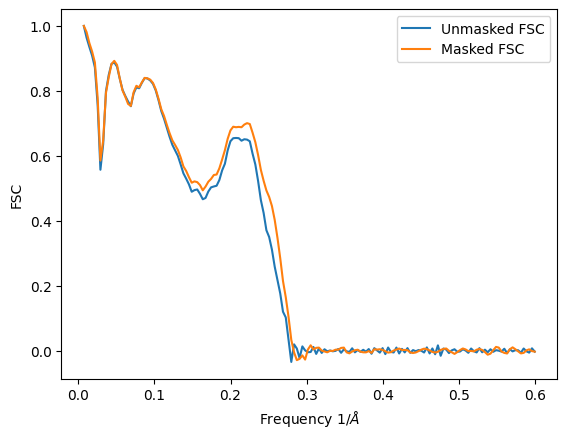

In [10]:
from locscale.include.emmer.ndimage.profile_tools import frequency_array

freq = frequency_array(fsc_raw, apix)

plt.plot(freq, fsc_raw, label="Unmasked FSC")
plt.plot(freq, fsc_masked, label="Masked FSC")

# draw a horizontal line at 0.5
#plt.axhline(y=0.5, color='k', linestyle='--', label="0.5 FSC")
plt.legend()
plt.xlabel("Frequency 1/$\AA$")
plt.ylabel("FSC")
# draw a second X axis with resolution in Angstrom




In [11]:
# Save the data to a CSV file
data = np.vstack((freq, fsc_raw, fsc_masked)).T
np.savetxt(pdb_path.replace(".pdb", "_fsc.csv"), data, delimiter=",", header="Frequency, FSC_raw, FSC_masked")
